In [2]:
from Accuracy import *
from Activation import *
from Layer import *
from Loss import *
from Model import *
from Optimizer import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split

In [3]:
def get_data():
    with open("data/X.pickle", "rb") as f:
        X = pickle.load(f)
    with open("data/y.pickle", "rb") as f:
        y = pickle.load(f)
    y = y.reshape(-1,1)
    X = X / 255
    X = X.reshape(X.shape[0], -1).astype(np.float32)
    return X, y

In [4]:
X, y = get_data()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size =0.25)

In [6]:
np.count_nonzero(y_train == 0)

9426

In [7]:
np.count_nonzero(y_train == 1)

9283

In [12]:
learning_rate = [0.01, 0.005, 0.001 ,0.0001]
# learning_rate = [0.001]

In [16]:
model_lists = []
for lr in learning_rate:
    print(f"TRAINING MODEL USING LEARNING RATE {lr} ")
    model = Model()
    model.add(Layer_Dense(X_train.shape[1], 128))
    model.add(Activation_Sigmoid())
    model.add(Layer_Dense(128, 128))
    model.add(Activation_Sigmoid())
    model.add(Layer_Dense(128, 128))
    model.add(Activation_Sigmoid())
    model.add(Layer_Dense(128, 1))
    model.add(Activation_Sigmoid())

    model.set(loss=Loss_BinaryCrossentropy(),
              optimizer=Optimizer_SGD(learning_rate=lr, decay=1e-3),
              accuracy=Accuracy_Categorical(binary=True))
    model.finalize()
    model.train(X_train, y_train,  epochs=30, validation_data = (X_test, y_test), batch_size=128, print_every=100)
    model_lists.append(model)

TRAINING MODEL USING LEARNING RATE 0.01 
epoch: 1
step: 0, acc: 0.484, loss: 0.696 lr: 0.01
step: 100, acc: 0.484, loss: 0.694 lr: 0.00909090909090909
step: 146, acc: 0.524, loss: 0.692 lr: 0.008726003490401398
training, acc: 0.500, loss: 0.693 lr: 0.008726003490401398
test, acc: 0.488, loss: 0.694
epoch: 2
step: 0, acc: 0.484, loss: 0.695 lr: 0.008718395815170008
step: 100, acc: 0.484, loss: 0.694 lr: 0.008019246190858061
step: 146, acc: 0.524, loss: 0.692 lr: 0.007733952049497294
training, acc: 0.502, loss: 0.693 lr: 0.007733952049497294
test, acc: 0.488, loss: 0.694
epoch: 3
step: 0, acc: 0.484, loss: 0.694 lr: 0.007727975270479134
step: 100, acc: 0.484, loss: 0.694 lr: 0.007173601147776183
step: 146, acc: 0.524, loss: 0.692 lr: 0.006944444444444444
training, acc: 0.503, loss: 0.693 lr: 0.006944444444444444
test, acc: 0.488, loss: 0.694
epoch: 4
step: 0, acc: 0.484, loss: 0.694 lr: 0.006939625260235947
step: 100, acc: 0.484, loss: 0.694 lr: 0.006489292667099287
step: 146, acc: 0.524

step: 146, acc: 0.524, loss: 0.693 lr: 0.0018487705675725645
training, acc: 0.500, loss: 0.693 lr: 0.0018487705675725645
test, acc: 0.488, loss: 0.693
TRAINING MODEL USING LEARNING RATE 0.005 
epoch: 1
step: 0, acc: 0.516, loss: 0.693 lr: 0.005
step: 100, acc: 0.484, loss: 0.694 lr: 0.004545454545454545
step: 146, acc: 0.524, loss: 0.693 lr: 0.004363001745200699
training, acc: 0.502, loss: 0.693 lr: 0.004363001745200699
test, acc: 0.488, loss: 0.694
epoch: 2
step: 0, acc: 0.484, loss: 0.694 lr: 0.004359197907585004
step: 100, acc: 0.484, loss: 0.693 lr: 0.0040096230954290305
step: 146, acc: 0.524, loss: 0.693 lr: 0.003866976024748647
training, acc: 0.506, loss: 0.693 lr: 0.003866976024748647
test, acc: 0.488, loss: 0.693
epoch: 3
step: 0, acc: 0.484, loss: 0.694 lr: 0.003863987635239567
step: 100, acc: 0.484, loss: 0.693 lr: 0.0035868005738880914
step: 146, acc: 0.524, loss: 0.693 lr: 0.003472222222222222
training, acc: 0.506, loss: 0.693 lr: 0.003472222222222222
test, acc: 0.488, loss

step: 100, acc: 0.516, loss: 0.693 lr: 0.0009323140033563302
step: 146, acc: 0.524, loss: 0.693 lr: 0.0009243852837862822
training, acc: 0.504, loss: 0.693 lr: 0.0009243852837862822
test, acc: 0.488, loss: 0.693
TRAINING MODEL USING LEARNING RATE 0.001 
epoch: 1
step: 0, acc: 0.516, loss: 0.693 lr: 0.001
step: 100, acc: 0.484, loss: 0.694 lr: 0.0009090909090909091
step: 146, acc: 0.476, loss: 0.694 lr: 0.0008726003490401397
training, acc: 0.496, loss: 0.694 lr: 0.0008726003490401397
test, acc: 0.512, loss: 0.693
epoch: 2
step: 0, acc: 0.516, loss: 0.693 lr: 0.0008718395815170008
step: 100, acc: 0.484, loss: 0.693 lr: 0.000801924619085806
step: 146, acc: 0.476, loss: 0.693 lr: 0.0007733952049497294
training, acc: 0.491, loss: 0.693 lr: 0.0007733952049497294
test, acc: 0.512, loss: 0.693
epoch: 3
step: 0, acc: 0.516, loss: 0.693 lr: 0.0007727975270479134
step: 100, acc: 0.516, loss: 0.693 lr: 0.0007173601147776183
step: 146, acc: 0.524, loss: 0.693 lr: 0.0006944444444444445
training, acc

step: 100, acc: 0.516, loss: 0.693 lr: 0.00019171779141104295
step: 146, acc: 0.524, loss: 0.693 lr: 0.00019004180919802356
training, acc: 0.504, loss: 0.693 lr: 0.00019004180919802356
test, acc: 0.488, loss: 0.693
epoch: 30
step: 0, acc: 0.484, loss: 0.693 lr: 0.00019000570017100514
step: 100, acc: 0.516, loss: 0.693 lr: 0.00018646280067126605
step: 146, acc: 0.524, loss: 0.693 lr: 0.00018487705675725643
training, acc: 0.504, loss: 0.693 lr: 0.00018487705675725643
test, acc: 0.488, loss: 0.693
TRAINING MODEL USING LEARNING RATE 0.0001 
epoch: 1
step: 0, acc: 0.516, loss: 0.693 lr: 0.0001
step: 100, acc: 0.484, loss: 0.694 lr: 9.090909090909092e-05
step: 146, acc: 0.476, loss: 0.694 lr: 8.726003490401398e-05
training, acc: 0.496, loss: 0.694 lr: 8.726003490401398e-05
test, acc: 0.512, loss: 0.693
epoch: 2
step: 0, acc: 0.516, loss: 0.693 lr: 8.718395815170008e-05
step: 100, acc: 0.484, loss: 0.694 lr: 8.01924619085806e-05
step: 146, acc: 0.476, loss: 0.694 lr: 7.733952049497294e-05
tra

step: 100, acc: 0.484, loss: 0.693 lr: 1.9727756954034327e-05
step: 146, acc: 0.476, loss: 0.693 lr: 1.9550342130987292e-05
training, acc: 0.495, loss: 0.693 lr: 1.9550342130987292e-05
test, acc: 0.512, loss: 0.693
epoch: 29
step: 0, acc: 0.516, loss: 0.693 lr: 1.9546520719311964e-05
step: 100, acc: 0.516, loss: 0.693 lr: 1.9171779141104296e-05
step: 146, acc: 0.524, loss: 0.693 lr: 1.9004180919802356e-05
training, acc: 0.500, loss: 0.693 lr: 1.9004180919802356e-05
test, acc: 0.488, loss: 0.693
epoch: 30
step: 0, acc: 0.484, loss: 0.693 lr: 1.9000570017100515e-05
step: 100, acc: 0.516, loss: 0.693 lr: 1.8646280067126605e-05
step: 146, acc: 0.524, loss: 0.693 lr: 1.8487705675725646e-05
training, acc: 0.504, loss: 0.693 lr: 1.8487705675725646e-05
test, acc: 0.488, loss: 0.693


In [17]:
model_relu = []
for lr in learning_rate:
    print(f"TRAINING MODEL USING LEARNING RATE {lr} ")
    model = Model()
    model.add(Layer_Dense(X_train.shape[1], 128))
    model.add(Activation_ReLU())
    model.add(Layer_Dense(128, 128))
    model.add(Activation_ReLU())
    model.add(Layer_Dense(128, 128))
    model.add(Activation_ReLU())
    model.add(Layer_Dense(128, 1))
    model.add(Activation_Sigmoid())

    model.set(loss=Loss_BinaryCrossentropy(),
              optimizer=Optimizer_Adam(learning_rate=lr, decay=1e-3),
              accuracy=Accuracy_Categorical(binary=True))
    model.finalize()
    model.train(X_train, y_train,  epochs=10, validation_data = (X_test, y_test), batch_size=128, print_every=100)
    model_relu.append(model)

TRAINING MODEL USING LEARNING RATE 0.01 
epoch: 1
step: 0, acc: 0.516, loss: 0.693 lr: 0.01
step: 100, acc: 0.484, loss: 0.699 lr: 0.00909090909090909
step: 146, acc: 0.524, loss: 0.693 lr: 0.008726003490401398
training, acc: 0.504, loss: 0.694 lr: 0.008726003490401398
test, acc: 0.488, loss: 0.694
epoch: 2
step: 0, acc: 0.484, loss: 0.694 lr: 0.008718395815170008
step: 100, acc: 0.516, loss: 0.693 lr: 0.008019246190858061
step: 146, acc: 0.476, loss: 0.694 lr: 0.007733952049497294
training, acc: 0.503, loss: 0.693 lr: 0.007733952049497294
test, acc: 0.512, loss: 0.693
epoch: 3
step: 0, acc: 0.516, loss: 0.693 lr: 0.007727975270479134
step: 100, acc: 0.516, loss: 0.693 lr: 0.007173601147776183
step: 146, acc: 0.476, loss: 0.694 lr: 0.006944444444444444
training, acc: 0.503, loss: 0.693 lr: 0.006944444444444444
test, acc: 0.512, loss: 0.693
epoch: 4
step: 0, acc: 0.516, loss: 0.693 lr: 0.006939625260235947
step: 100, acc: 0.516, loss: 0.693 lr: 0.006489292667099287
step: 146, acc: 0.476

step: 100, acc: 0.633, loss: 0.618 lr: 0.0004127115146512588
step: 146, acc: 0.810, loss: 0.509 lr: 0.00040502227622519235
training, acc: 0.640, loss: 0.634 lr: 0.00040502227622519235
test, acc: 0.606, loss: 0.656
TRAINING MODEL USING LEARNING RATE 0.0001 
epoch: 1
step: 0, acc: 0.484, loss: 0.693 lr: 0.0001
step: 100, acc: 0.516, loss: 0.691 lr: 9.090909090909092e-05
step: 146, acc: 0.667, loss: 0.681 lr: 8.726003490401398e-05
training, acc: 0.530, loss: 0.692 lr: 8.726003490401398e-05
test, acc: 0.560, loss: 0.688
epoch: 2
step: 0, acc: 0.570, loss: 0.684 lr: 8.718395815170008e-05
step: 100, acc: 0.562, loss: 0.682 lr: 8.01924619085806e-05
step: 146, acc: 0.714, loss: 0.665 lr: 7.733952049497294e-05
training, acc: 0.564, loss: 0.681 lr: 7.733952049497294e-05
test, acc: 0.567, loss: 0.676
epoch: 3
step: 0, acc: 0.570, loss: 0.671 lr: 7.727975270479133e-05
step: 100, acc: 0.594, loss: 0.671 lr: 7.173601147776183e-05
step: 146, acc: 0.667, loss: 0.660 lr: 6.944444444444444e-05
training,

In [18]:
best_model = model_relu[1]
PREDICT_LABEL = {0: "dog", 1: "cat"}

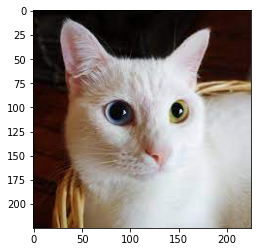

Prediction: cat


In [19]:
path = 'TestImg/cat1.jpg'
img=mpimg.imread(path)
imgplot=plt.imshow(img)
plt.show()
X = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50, 50))
X = np.array(X)
X = X / 255
X = X.reshape(1, -1)
confidences = best_model.predict(X)
predictions = best_model.output_layer_activation.predictions(confidences)
predictions = predictions.reshape(-1)
predictions = int(predictions)
label = PREDICT_LABEL[predictions]
print(f"Prediction: {label}")

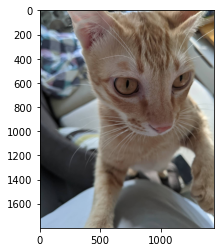

Prediction: dog


In [20]:
path = 'TestImg/cat2.jpg'
img=mpimg.imread(path)
imgplot=plt.imshow(img)
plt.show()
X = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50, 50))
X = np.array(X)
X = X / 255
X = X.reshape(1, -1)
confidences = best_model.predict(X)
predictions = best_model.output_layer_activation.predictions(confidences)
predictions = predictions.reshape(-1)
predictions = int(predictions)
label = PREDICT_LABEL[predictions]
print(f"Prediction: {label}")

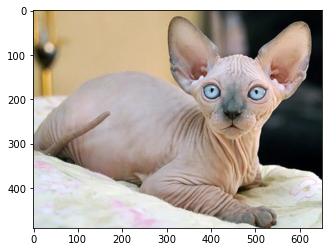

Prediction: cat


In [21]:
path = 'TestImg/cat3.jpg'
img=mpimg.imread(path)
imgplot=plt.imshow(img)
plt.show()
X = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50, 50))
X = np.array(X)
X = X / 255
X = X.reshape(1, -1)
confidences = best_model.predict(X)
predictions = best_model.output_layer_activation.predictions(confidences)
predictions = predictions.reshape(-1)
predictions = int(predictions)
label = PREDICT_LABEL[predictions]
print(f"Prediction: {label}")

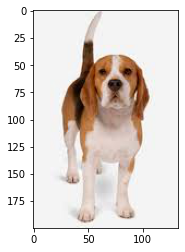

Prediction: dog


In [22]:
path = 'TestImg/dog2.jpg'
img=mpimg.imread(path)
imgplot=plt.imshow(img)
plt.show()
X = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50, 50))
X = np.array(X)
X = X / 255
X = X.reshape(1, -1)
confidences = best_model.predict(X)
predictions = best_model.output_layer_activation.predictions(confidences)
predictions = predictions.reshape(-1)
predictions = int(predictions)
label = PREDICT_LABEL[predictions]
print(f"Prediction: {label}")

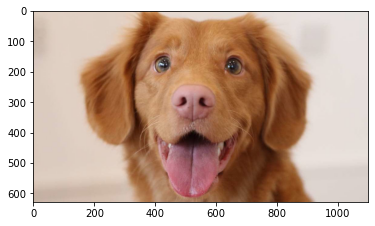

Prediction: dog


In [23]:
path = 'TestImg/dog1.jpg'
img=mpimg.imread(path)
imgplot=plt.imshow(img)
plt.show()
X = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50, 50))
X = np.array(X)
X = X / 255
X = X.reshape(1, -1)
confidences = best_model.predict(X)
predictions = best_model.output_layer_activation.predictions(confidences)
predictions = predictions.reshape(-1)
predictions = int(predictions)
label = PREDICT_LABEL[predictions]
print(f"Prediction: {label}")

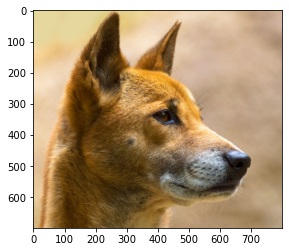

Prediction: dog


In [24]:
path = 'TestImg/dog4.jpg'
img=mpimg.imread(path)
imgplot=plt.imshow(img)
plt.show()
X = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50, 50))
X = np.array(X)
X = X / 255
X = X.reshape(1, -1)
confidences = best_model.predict(X)
predictions = best_model.output_layer_activation.predictions(confidences)
predictions = predictions.reshape(-1)
predictions = int(predictions)
label = PREDICT_LABEL[predictions]
print(f"Prediction: {label}")

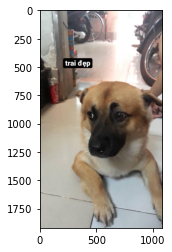

Prediction: dog


In [25]:
path = 'TestImg/dog7.jpg'
img=mpimg.imread(path)
imgplot=plt.imshow(img)
plt.show()
X = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50, 50))
X = np.array(X)
X = X / 255
X = X.reshape(1, -1)
confidences = best_model.predict(X)
predictions = best_model.output_layer_activation.predictions(confidences)
predictions = predictions.reshape(-1)
predictions = int(predictions)
label = PREDICT_LABEL[predictions]
print(f"Prediction: {label}")